In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to include the channel dimension (since MNIST is grayscale, we have only one channel)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
model = models.Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the result and feed it into a dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 classes (digits 0-9)
model.add(layers.Dense(10, activation='softmax'))

C:\Users\HW798MH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 22ms/step - accuracy: 0.8677 - loss: 0.4213 - val_accuracy: 0.9804 - val_loss: 0.0588
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9832 - loss: 0.0543 - val_accuracy: 0.9876 - val_loss: 0.0397
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9879 - loss: 0.0378 - val_accuracy: 0.9873 - val_loss: 0.0404
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9908 - loss: 0.0275 - val_accuracy: 0.9889 - val_loss: 0.0349
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9921 - loss: 0.0232 - val_accuracy: 0.9917 - val_loss: 0.0282


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9884 - loss: 0.0383
Test accuracy: 0.9916999936103821


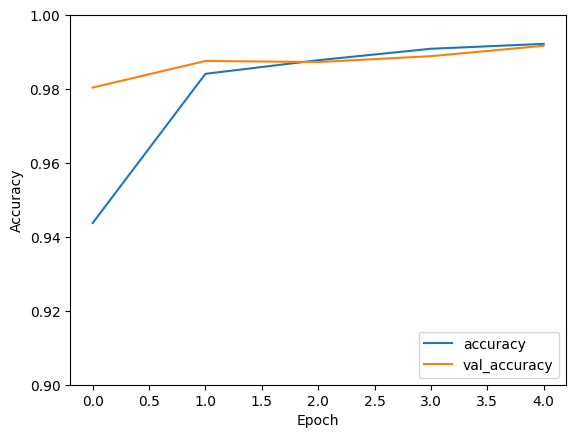

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()

In [11]:
# Make predictions on the test set
predictions = model.predict(x_test)

# predictions are in the form of probabilities for each class; 
# to get the actual predicted classes, use argmax
predicted_classes = predictions.argmax(axis=1)

# The true classes (for comparison)
true_classes = y_test.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


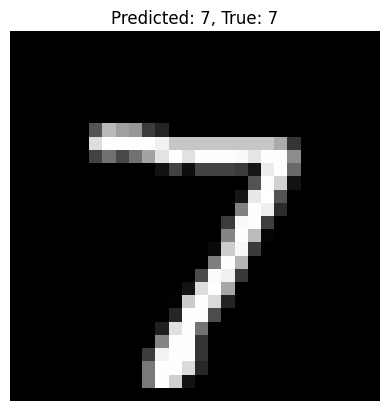

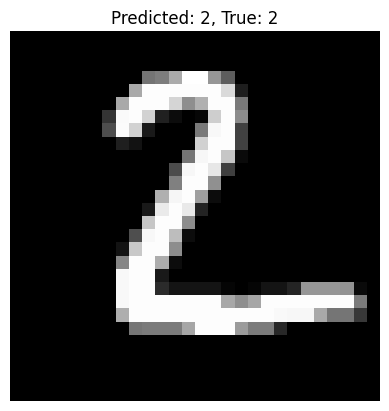

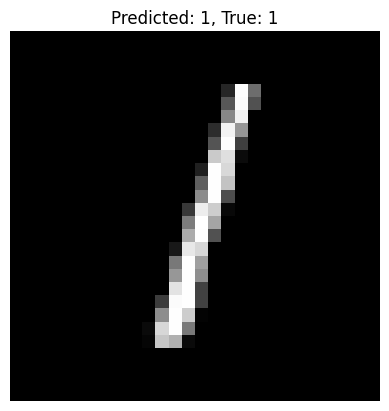

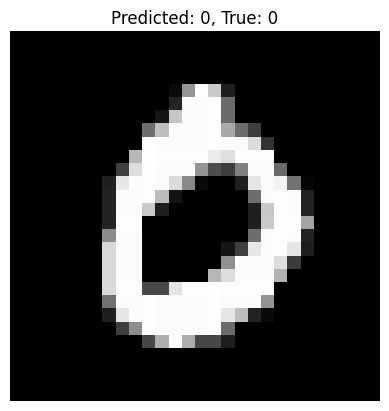

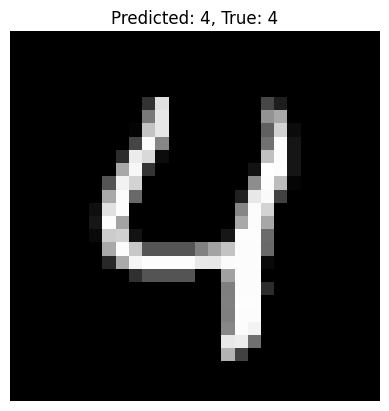

In [12]:
import numpy as np

# Display the first 5 predictions
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, True: {true_classes[i]}")
    plt.axis('off')
    plt.show()


In [13]:
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f"Prediction accuracy: {accuracy}")


Prediction accuracy: 0.9917
